In [207]:
import matplotlib.pyplot as plt
import numpy as np
from math import *

In [197]:
def FFTCalculation(f, inverse):
    n = len(f)
    if n == 1:
        return f
    even = FFTCalculation(f[::2], inverse)
    odd = FFTCalculation(f[1::2], inverse)
    if inverse:
        ang = 2 * pi / n
    else:
        ang = -2 * pi / n
    w = complex(cos(ang), sin(ang))
    res = [complex(0, 0)] * n
    for i in range(n // 2):
        res[i] = even[i] + (w ** i) * odd[i];
        res[i + n // 2] = even[i] - (w ** i) * odd[i];
    return res
    
def FFT(f, inverse = False):
    n = len(f)
    f = np.append(f, np.zeros(2 ** (ceil(np.log2(n))) - n))
    return FFTCalculation(f, inverse)[:n]
    
def IFFT(f):
    n = len(f)
    f = np.append(f, np.zeros(2 ** (ceil(np.log2(n))) - n))
    res = FFT(f, True)[:n] 
    for i in range(len(res)):
        res[i] = res[i] / n
    return res

In [303]:
def draw(func, title, null = 0):
    def discretize(func):
        x = [i / 25 for i in range(1, 257)]
        y = [func(i / 25) for i in range(1, 257)]
        return x, y
    
    x, y = discretize(func)
    transformed = FFT(y)
    if null > 0:
        null_number = int(len(y) * null)
        for i in range(len(y) - null_number, len(y)):
            transformed[i] = 0
    inverse = IFFT(transformed)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(x, inverse, label="inverse")
    plt.plot(x, y, label="initial")
    plt.title(title)
    plt.legend()
    plt.show()

In [269]:
def linear(x):
    return x

def square(x):
    return x * x

def square_sin(x):
    return sin(x * x)

def sin_div_by_x(x):
    return sin(x) / x

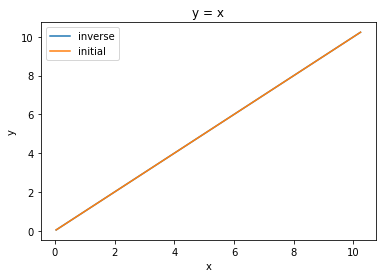

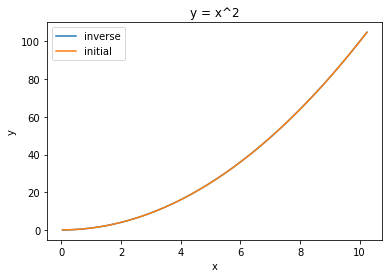

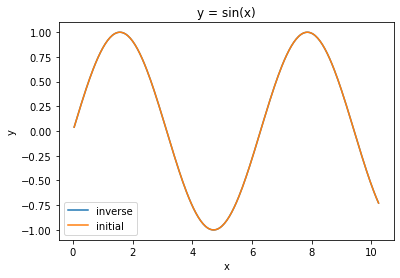

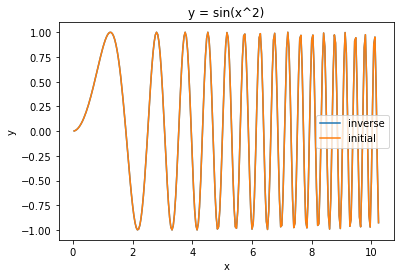

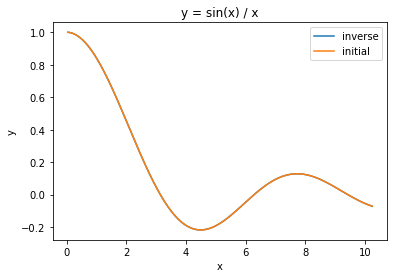

In [300]:
draw(linear, "y = x")
draw(square, "y = x^2")
draw(sin, "y = sin(x)")
draw(square_sin, "y = sin(x^2)")
draw(sin_div_by_x, "y = sin(x) / x")

1


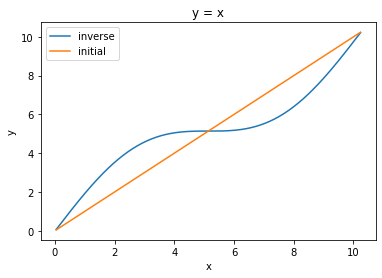

1


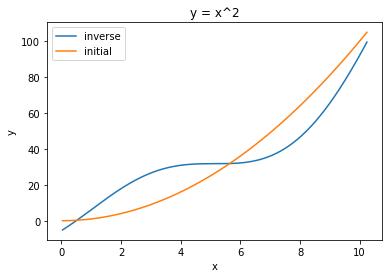

1


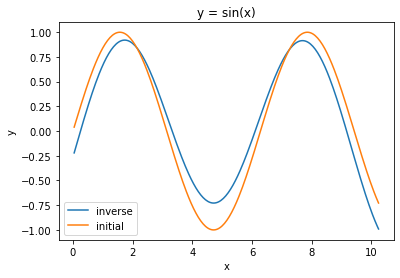

1


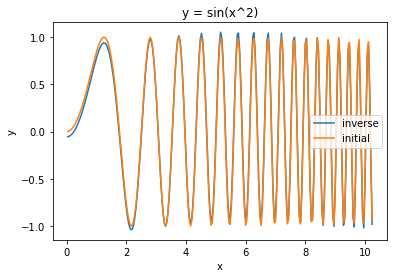

1


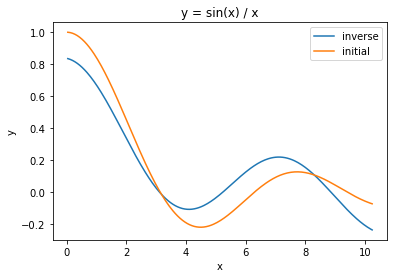

In [306]:
null = 0.005
draw(linear, "y = x (null = 0.005%)", null)
draw(square, "y = x^2 (null = 0.005%)", null)
draw(sin, "y = sin(x) (null = 0.005%)", null)
draw(square_sin, "y = sin(x^2) (null = 0.005%)", null)
draw(sin_div_by_x, "y = sin(x) / x (null = 0.005%)", null)

128


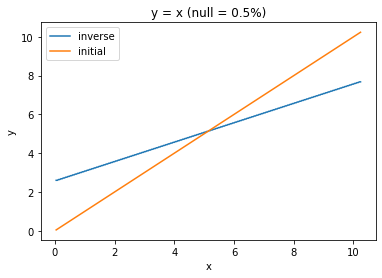

128


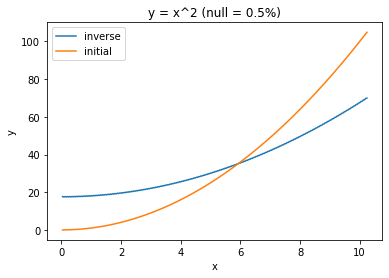

128


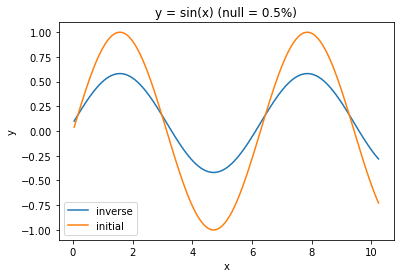

128


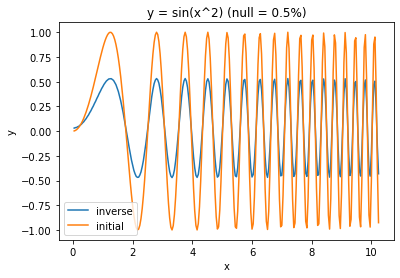

128


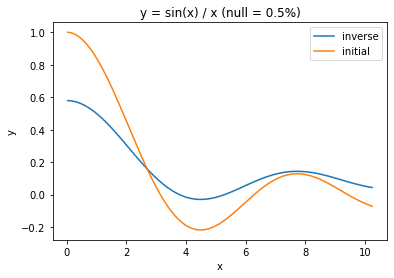

In [307]:
null = 0.5
draw(linear, "y = x (null = 0.5%)", null)
draw(square, "y = x^2 (null = 0.5%)", null)
draw(sin, "y = sin(x) (null = 0.5%)", null)
draw(square_sin, "y = sin(x^2) (null = 0.5%)", null)
draw(sin_div_by_x, "y = sin(x) / x (null = 0.5%)", null)

64


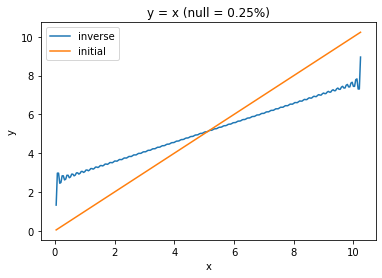

64


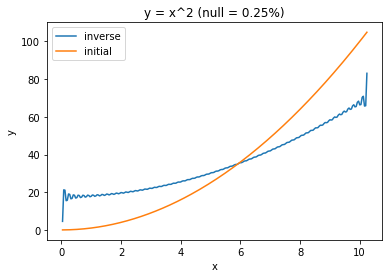

64


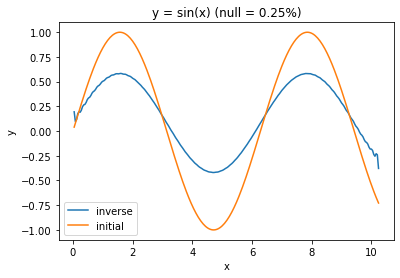

64


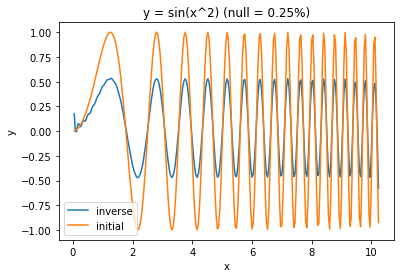

64


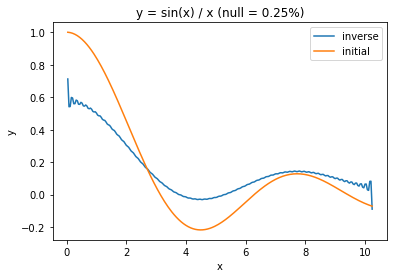

In [309]:
null = 0.25
draw(linear, "y = x (null = 0.25%)", null)
draw(square, "y = x^2 (null = 0.25%)", null)
draw(sin, "y = sin(x) (null = 0.25%)", null)
draw(square_sin, "y = sin(x^2) (null = 0.25%)", null)
draw(sin_div_by_x, "y = sin(x) / x (null = 0.25%)", null)

230


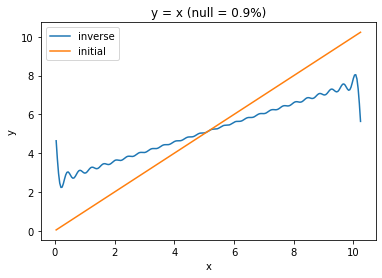

230


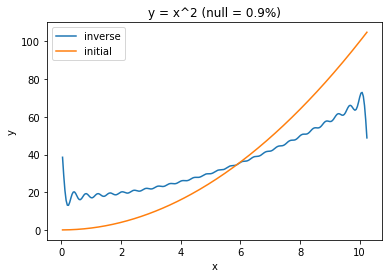

230


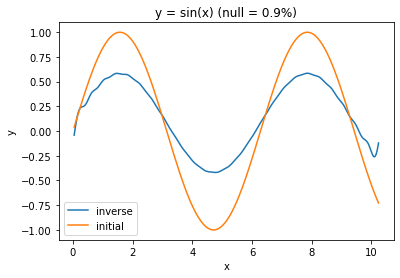

230


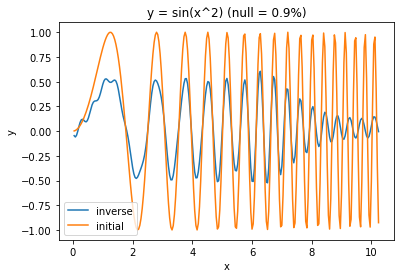

230


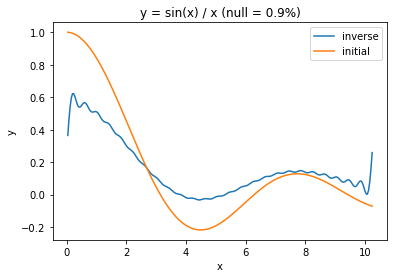

In [308]:
null = 0.9
draw(linear, "y = x (null = 0.9%)", null)
draw(square, "y = x^2 (null = 0.9%)", null)
draw(sin, "y = sin(x) (null = 0.9%)", null)
draw(square_sin, "y = sin(x^2) (null = 0.9%)", null)
draw(sin_div_by_x, "y = sin(x) / x (null = 0.9%)", null)